In [10]:
# Obtaining the MNIST dataset
# download from http://yann.lecun.com/exdb/mnist/

import os
import struct
import numpy as np
def load_mnist(path, kind='train'):
    """Load MNIST data from 'path'
        Returns two arrays:
        1. n x m dimensional NumPy array (images) - unroll 28 x 28 pixel into 1d row vector samples
        2. target variable class labels (integers 0-9) (labels)
    """
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte'
                              % kind)
    images_path = os.path.join(path,
                              '%s-images-idx3-ubyte'
                              % kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8)) # > means big endian, I is unsigned integer, 8 bytes
        labels = np.fromfile(lbpath, dtype=np.uint8)
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",
                                              imgpath.read(16))
        images = np.fromfile(imgpath,
                            dtype=np.uint8).reshape(len(labels),784)
    
    return images, labels

In [11]:
# Training set
X_train, y_train = load_mnist('mnist', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [14]:
# Test set
X_test, y_test = load_mnist('mnist', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


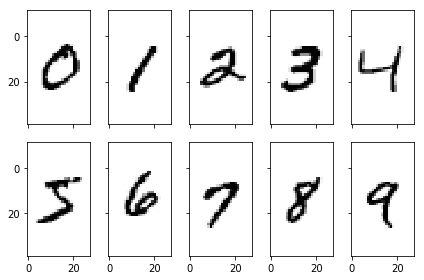

In [17]:
# Visualize MNIST
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28) # change to image format, take first example from training set
    ax[i].imshow(img, cmap='Greys', interpolation='nearest') #imshow display image on axis, interpolate to fill blanks
ax[0].set_xticks([]) # no ticks
ax[0].set_yticks([]) # no ticks
plt.tight_layout()
plt.show()

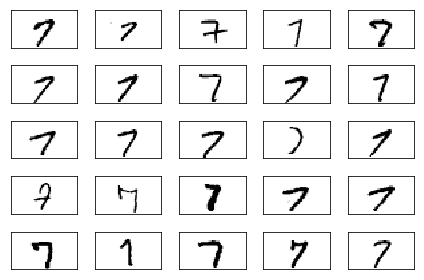

In [23]:
# plot multiple examples of same digit
fig, ax = plt.subplots(nrows=5,
                     ncols=5,
                     sharex=True,
                     sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()